In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [31]:
df = pd.read_csv("out/data.csv")
df['StartTime'] = pd.to_datetime(df['StartTime'])
df.head()

,ID,StartTime,Duration_ns,ConnDuration_ns,DialDuration_ns,DNSDuration_ns,RequestDuration_ns,Status,StatusCode,Error
0,GET /,2024-02-12 13:45:13+01:00,418841875,267680750,145988917,121359000,180584,200 OK,200,NaN
1,GET /,2024-02-12 13:45:13+01:00,418908500,269863708,148205209,121366166,35791,200 OK,200,NaN
2,GET /,2024-02-12 13:45:13+01:00,420239167,268369791,146708916,121409333,50917,200 OK,200,NaN
3,GET /,2024-02-12 13:45:13+01:00,422931584,270470208,148440208,121800916,24333,200 OK,200,NaN
4,GET /anything,2024-02-12 13:45:14+01:00,299139458,147991959,147520958,330000,204917,200 OK,200,NaN


In [32]:
for col in df.columns:
    if col.endswith('_ns'):
        ms_col = col.replace('_ns','_ms')
        df[ms_col] = df[col]/1000000

In [33]:
aggs = {
    col: ['count','mean','std'] for col in df.columns if col.endswith('_ms')
}
df.groupby(['ID','StatusCode']).agg(aggs)

Duration_ms                        ConnDuration_ms  \
                               count        mean        std           count   
ID            StatusCode                                                      
GET /         200                251  329.425295  96.450085             251   
GET /anything 200                251  317.578837  78.135599             251   
PUT /anything 200                250  320.529285  83.760656             250   

                                                DialDuration_ms              \
                                mean        std           count        mean   
ID            StatusCode                                                      
GET /         200         150.583316  17.627077             251  146.715278   
GET /anything 200         148.792607   9.016868             251  146.814069   
PUT /anything 200         148.309659   3.064132             250  146.364339   

                                   DNSDuration_ms                       \
                               std          count      mean        std   
ID            StatusCode                                                 
GET /         200         9.128634            251  3.699981  15.034421   
GET /anything 200         9.011425            251  1.799757   0.509182   
PUT /anything 200         3.039186            250  1.773960   0.575010   

                         RequestDuration_ms                      
                                      count      mean       std  
ID            StatusCode                                         
GET /         200                       251  0.127042  0.047258  
GET /anything 200                       251  0.131737  0.085191  
PUT /anything 200                       250  0.154570  0.141639

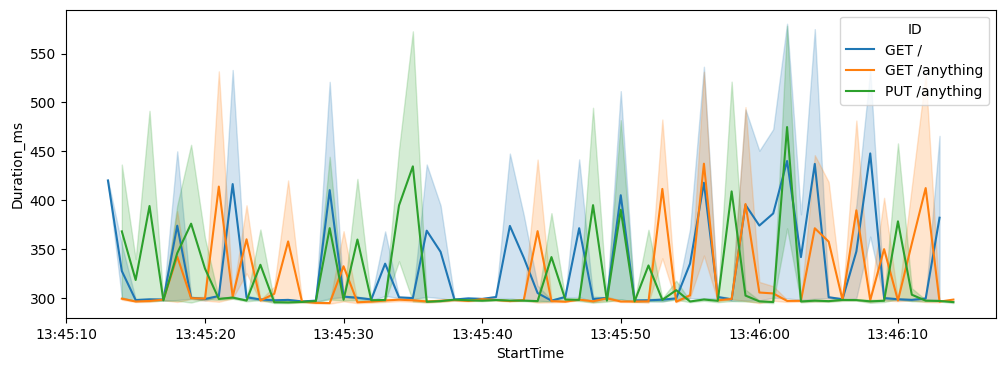

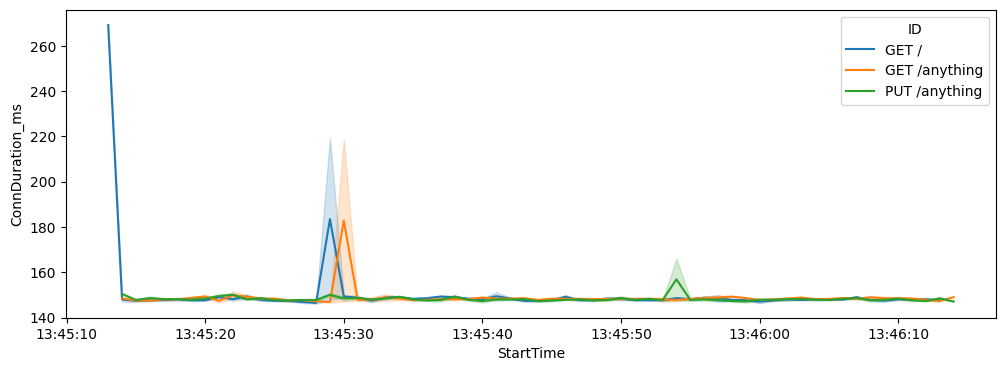

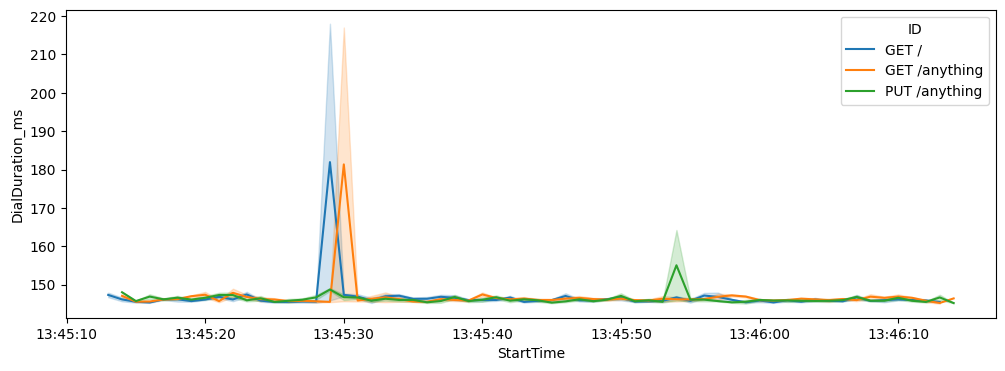

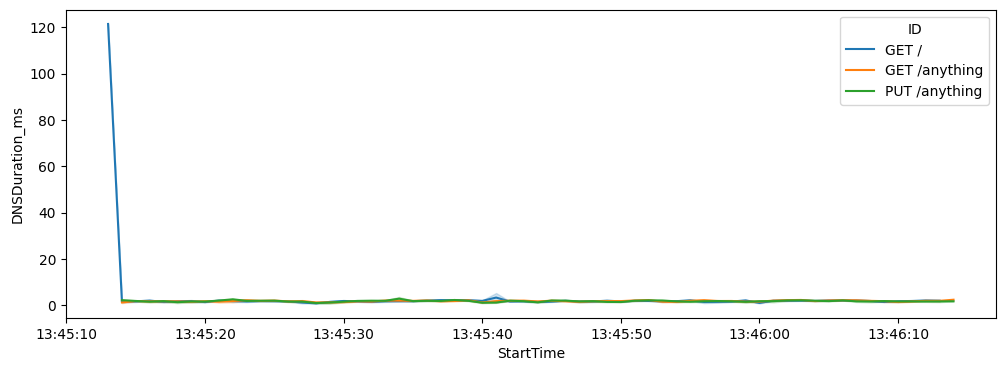

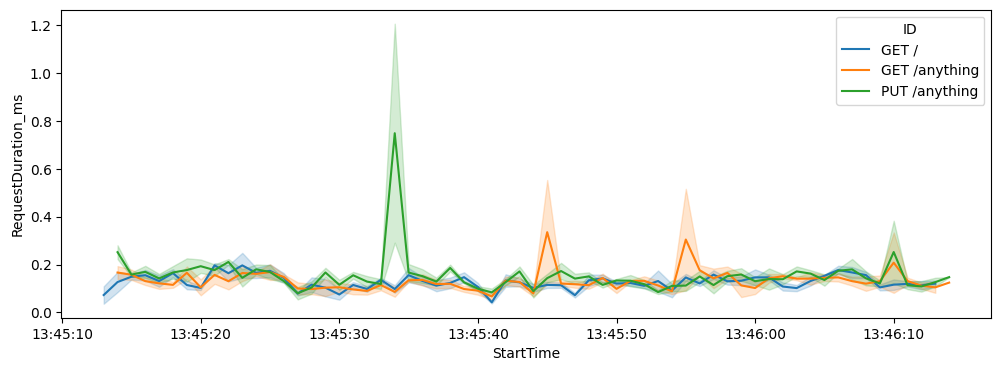

In [35]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.lineplot(data=df,x='StartTime',y=col,hue="ID",errorbar='se')
        plt.show()

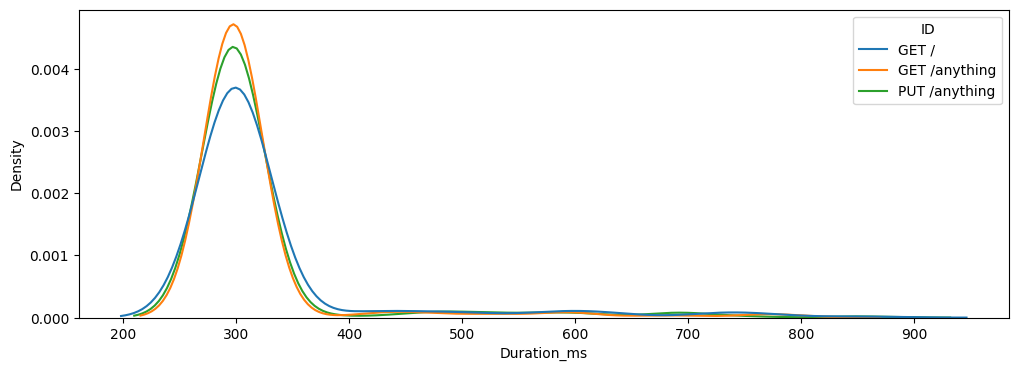

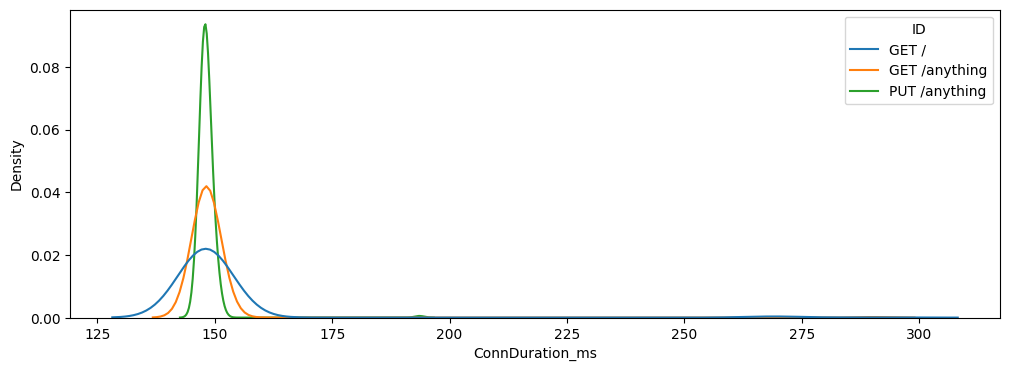

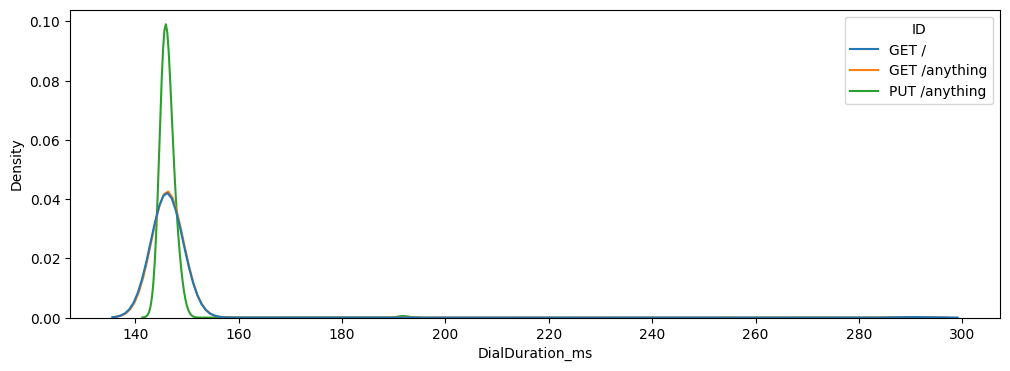

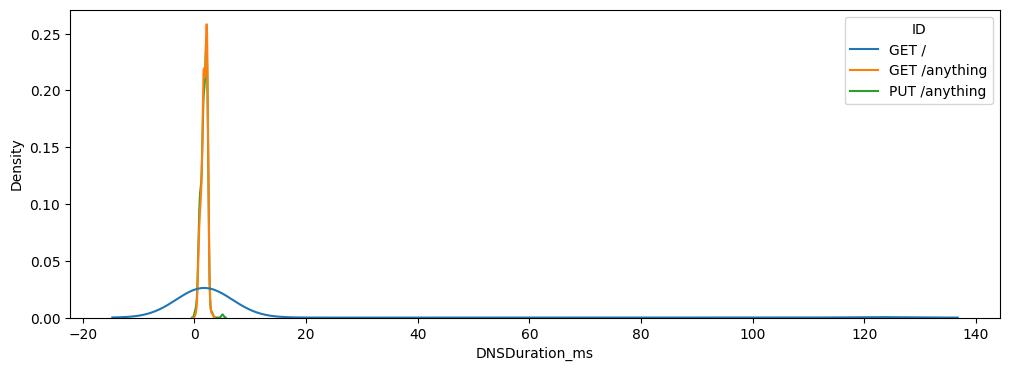

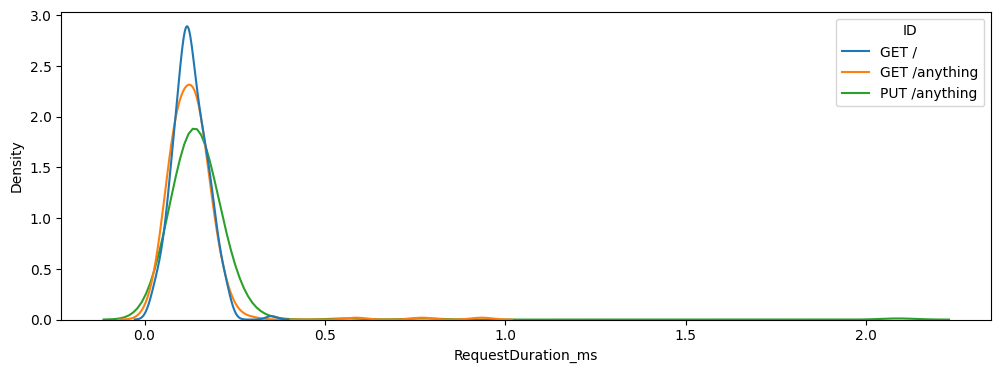

In [36]:
for col in df.columns:
    if col.endswith('_ms'):
        plt.figure(figsize=(12,4))
        sns.kdeplot(data=df,x=col,hue="ID")
        plt.show()